In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib as mpl

In [2]:
%cd C:\\Users\\Admin\\Documents\\4060\\final

C:\Users\Admin\Documents\4060\final


In [3]:
wts1 = sc.read_10x_mtx('./',prefix='GSM4852284_84849_')
wts2 = sc.read_10x_mtx('./',prefix='GSM4852285_84850_')
wts3 = sc.read_10x_mtx('./',prefix='GSM4852286_84851_')
wts4 = sc.read_10x_mtx('./',prefix='GSM4852287_84852_')

kos1 = sc.read_10x_mtx('./',prefix='GSM4852288_84853_')
kos2 = sc.read_10x_mtx('./',prefix='GSM4852289_84854_')
kos3 = sc.read_10x_mtx('./',prefix='GSM4852290_84855_')
kos4 = sc.read_10x_mtx('./',prefix='GSM4852291_84856_')

In [4]:
wtsm = wts1.concatenate(wts2, wts3, wts4)      #concatent the imported anndata into experimental group and control group
kosm = kos1.concatenate(kos2, kos3, kos4)

C:\ANACONDA\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
C:\ANACONDA\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [5]:
wtsm.write('write/wtlg.h5ad')
kosm.write('write/kolg.h5ad')

In [5]:
sc.pp.filter_cells(wtsm, min_genes=200)    #Cells expressing fewer than 200 or more than 5,000 unique genes and 
sc.pp.filter_cells(wtsm, max_genes=5000)   #cells with more than 7.5% mitochondrial content were discarded
sc.pp.filter_genes(wtsm, min_cells=3)
sc.pp.filter_cells(kosm, min_genes=200)
sc.pp.filter_cells(kosm, max_genes=5000)
sc.pp.filter_genes(kosm, min_cells=3)

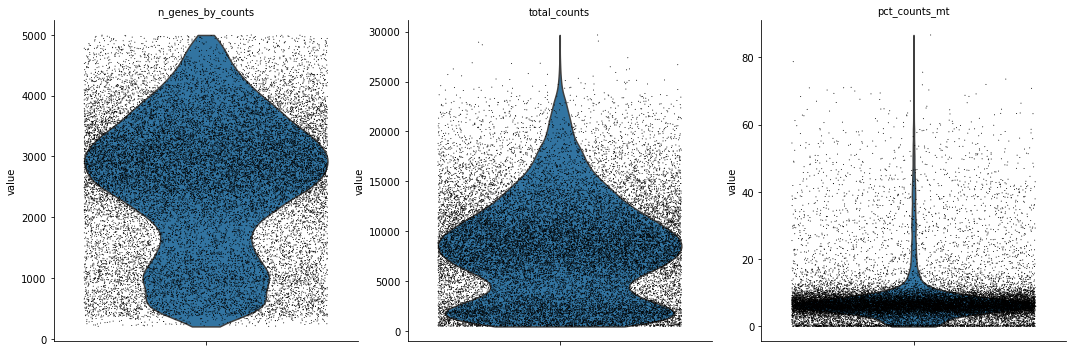

In [6]:
# data preprossing for wild type samples
wtsm.var['mt'] = wtsm.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(wtsm, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pl.violin(wtsm, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [7]:
#filter out samples (cells) with more than 5000 experssion or less than 200 expression and more than 7.5% MT gene
wtsm = wtsm[wtsm.obs.pct_counts_mt < 7.5, :]

In [8]:
sc.pp.normalize_total(wtsm, target_sum=1e4)    #normalize cell with a scaling factor of 10000
sc.pp.log1p(wtsm)
sc.pp.highly_variable_genes(wtsm, flavor='seurat', n_top_genes=2000, inplace=True)    #choose the top 2000 variable genes

C:\ANACONDA\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [9]:
wtsm.raw = wtsm

In [10]:
# data preprossing for knock out samples
kosm.var['mt'] = kosm.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(kosm, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

#filter out samples (cells) with more than 5000 experssion or less than 200 expression and more than 7.5% MT gene
kosm = kosm[kosm.obs.pct_counts_mt < 7.5, :]

In [11]:
sc.pp.normalize_total(kosm, target_sum=1e4)    #normalize cell with a scaling factor of 10000
sc.pp.log1p(kosm)
sc.pp.highly_variable_genes(kosm, flavor='seurat', n_top_genes=2000, inplace=True)    #choose the top 2000 variable genes

C:\ANACONDA\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [12]:
kosm.raw = kosm

In [13]:
wtsm

AnnData object with n_obs × n_vars = 14766 × 18076
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [14]:
wtsm.obs['treatment'] = 'WildType'    #label the treatment group

In [15]:
kosm.obs['treatment'] = 'KnockOut'

In [16]:
wtsm_cut = wtsm[:, wtsm.var.highly_variable]
kosm_cut = kosm[:, kosm.var.highly_variable]

In [79]:
sp_all = wtsm_cut.concatenate(kosm_cut)    #merge both treatment groups

C:\ANACONDA\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [80]:
sp_all

AnnData object with n_obs × n_vars = 28408 × 1232
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'treatment'
    var: 'gene_ids', 'mt', 'highly_variable', 'feature_types-0', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'feature_types-1', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'

In [141]:
sc.pp.scale(sp_all, max_value=10)

In [142]:
sc.tl.pca(sp_all, svd_solver='arpack')

In [143]:
sc.pp.neighbors(sp_all, n_neighbors=15, n_pcs=20)


In [144]:
results_file = 'write/preprossedmerged.h5ad'  # the file that will store the analysis results
sp_all.write(results_file)

In [145]:
sc.tl.umap(sp_all, min_dist=0.5)

In [152]:
sc.tl.leiden(sp_all,resolution=1.2)

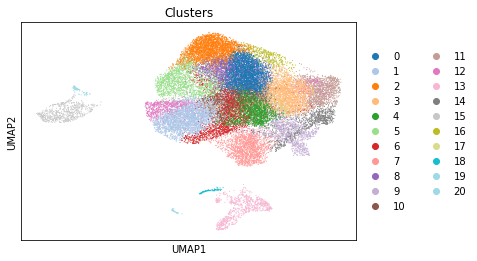

In [153]:
sc.pl.umap(
    sp_all, 
    color=['leiden'],
    palette='tab20', # 'palette' specifies the colormap to use)
    title=["Clusters"]
)

In [154]:
marker_genes = ['Tyr', 'Mlana', 'Pmel', 'Dct', 'Mitf', 'Ptgds', 'Cd68', 'Lyz2', 'Aif1', 'Dab2', 'Lgals3', 'Trem2', 'Apoe', 
               'Ccr7', 'H2-Eb1', 'H2-Aa', 'H2-Ab1', 'Ccl5', 'Cd3e', 'Cd3g', 'Nkg7', 'Cd3d', 'Gzma', 'Pecam1', 'Cdh5', 'Cd34', 
               'Flt1', 'Cldn5', 'Col1a1', 'Col1a2', 'Acta2', 'Dcn', 'Col3a1', 'Pdgfrb', 'Pdpn', 'Irf8', 'Ccr9', 'Plac8',
                'Bst2']

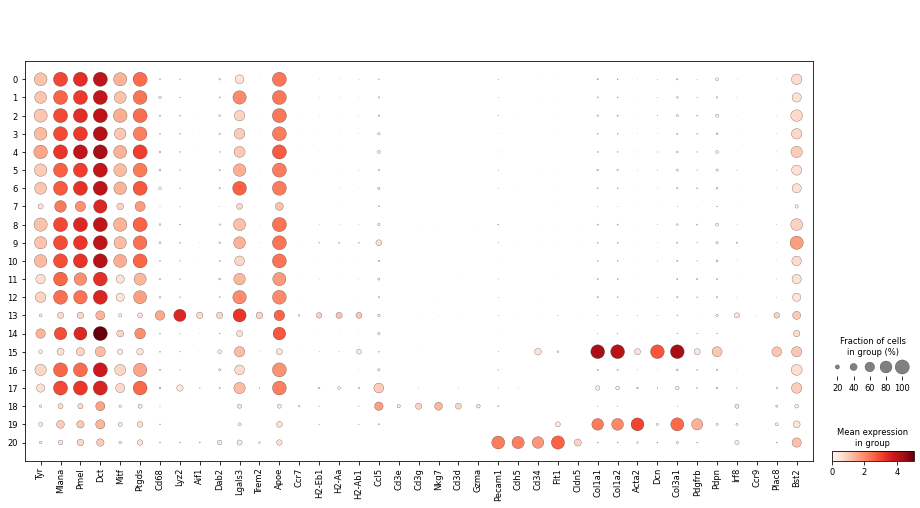

In [155]:
sc.pl.dotplot(sp_all, marker_genes, groupby='leiden')

In [156]:
sp_all

AnnData object with n_obs × n_vars = 28408 × 1232
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'treatment', 'leiden', 'annotation'
    var: 'gene_ids', 'mt', 'highly_variable', 'feature_types-0', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'feature_types-1', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'mean', 'std'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'annotation_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [157]:
sp_all.obs['annotation'] = 'haha'

In [159]:
pd.options.mode.chained_assignment = None 
for i in range(len(sp_all.obs['leiden'])):
    if int(sp_all.obs['leiden'][i]) == 14:
        sp_all.obs['annotation'][i] = 'Melanoma cells'
    if int(sp_all.obs['leiden'][i]) == 16:
        sp_all.obs['annotation'][i] = 'Melanoma cells'
    if int(sp_all.obs['leiden'][i]) == 17:
        sp_all.obs['annotation'][i] = 'Melanoma cells'
    elif (0 <= int(sp_all.obs['leiden'][i]) and int(sp_all.obs['leiden'][i])<= 12):
        sp_all.obs['annotation'][i] = 'Melanoma cells'
    elif int(sp_all.obs['leiden'][i]) == 15:
        sp_all.obs['annotation'][i] = 'CAFs'
    elif int(sp_all.obs['leiden'][i]) == 19:
        sp_all.obs['annotation'][i] = 'CAFs'
    elif int(sp_all.obs['leiden'][i]) == 13:
        sp_all.obs['annotation'][i] = 'TAMs'
    elif int(sp_all.obs['leiden'][i]) == 18:
        sp_all.obs['annotation'][i] = 'TAMs/dendtirics'
    elif int(sp_all.obs['leiden'][i]) == 20:
        sp_all.obs['annotation'][i] = 'Endothelial cells'

In [208]:
if 'haha' in sp_all.obs['annotation']:
    print('oops')
else:
    print('yeah')

yeah


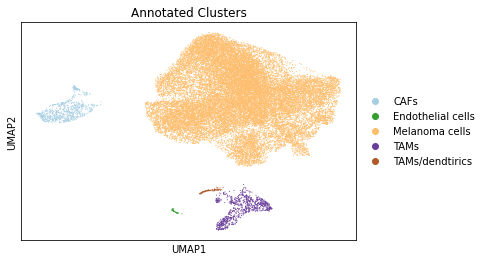

In [160]:
sc.pl.umap(
    sp_all, 
    color=['annotation'],
    palette='Paired', # 'palette' specifies the colormap to use)
    title=["Annotated Clusters"]
)

In [161]:
sp_CAF = sp_all[sp_all.obs.annotation == 'CAFs', :]

In [162]:
sp_CAF

View of AnnData object with n_obs × n_vars = 747 × 1232
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'treatment', 'leiden', 'annotation'
    var: 'gene_ids', 'mt', 'highly_variable', 'feature_types-0', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'feature_types-1', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'mean', 'std'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'annotation_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [163]:
df_violin = sc.get.obs_df(sp_CAF, ['Acta2', 'Pdgfrb', 'Col1a1', 'Col1a2', 'treatment'])


In [165]:
df_violin = df_violin.set_index('treatment').stack().reset_index()

<AxesSubplot:xlabel='gene', ylabel='value'>

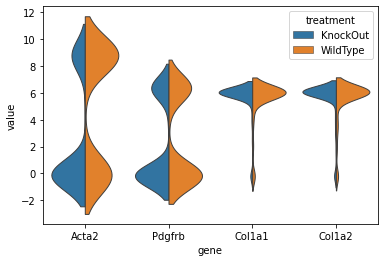

In [205]:
df_violin.columns = ['treatment', 'gene', 'value']
import seaborn as sns
sns.violinplot(data=df_violin, x='gene', y='value', hue="treatment",
                split=True, inner=None, linewidth=1, scale = 'width')    

In [209]:
sp_all.obs['DEGset'] = 'haha'

In [210]:
for i in range(len(sp_all.obs['annotation'])):
    if sp_all.obs['annotation'][i] == 'CAFs':
        if sp_all.obs['treatment'][i] == 'WildType':
            sp_all.obs['DEGset'][i] = 'CAF_WT'
        else: 
            sp_all.obs['DEGset'][i] = 'CAF_KO'
    else: 
        sp_all.obs['DEGset'][i] = 'Control'

In [212]:
#Defferential Expressed Gene Analysis for CAFs
sc.tl.rank_genes_groups(sp_all, 'DEGset', groups=["CAF_WT", "CAF_KO"],method='wilcoxon', reference = 'Control')


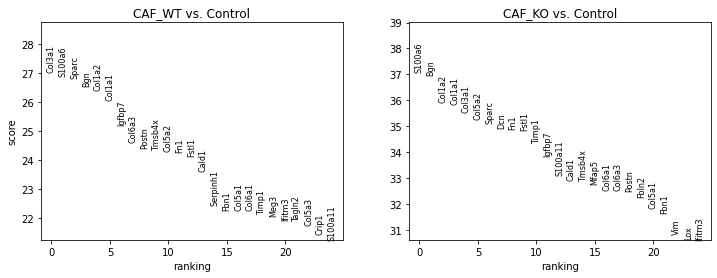

In [213]:
sc.pl.rank_genes_groups(sp_all, n_genes=25, sharey=False)

In [215]:
sp_all.uns['rank_genes_groups']

{'params': {'groupby': 'DEGset',
  'reference': 'Control',
  'method': 'wilcoxon',
  'use_raw': True,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('Col3a1', 'S100a6'), ('S100a6', 'Bgn'), ('Sparc', 'Col1a2'),
            ..., ('Mlana', 'Ftl1'), ('Tyrp1', 'Chchd10'), ('Dct', 'Dct')],
           dtype=[('CAF_WT', 'O'), ('CAF_KO', 'O')]),
 'scores': rec.array([( 27.030174,  37.070362), ( 26.909613,  36.978268),
            ( 26.852907,  35.91657 ), ..., (-23.269533, -31.422916),
            (-23.380707, -31.78134 ), (-23.923231, -33.426918)],
           dtype=[('CAF_WT', '<f4'), ('CAF_KO', '<f4')]),
 'pvals': rec.array([(6.53341697e-161, 8.43987456e-301),
            (1.69510718e-159, 2.55973300e-299),
            (7.80020337e-159, 1.68421807e-282), ...,
            (9.02362723e-120, 9.84319111e-217),
            (6.71639172e-121, 1.17221018e-221),
            (1.75566832e-126, 5.57292327e-245)],
           dtype=[('CAF_WT', '<f8'), ('CAF_KO', '<f8')]),
 '

In [216]:
# get deg result
result = sp_all.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs = pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names','scores', 'pvals','pvals_adj','logfoldchanges']})

In [217]:
degs

,CAF_WT_names,CAF_WT_scores,CAF_WT_pvals,CAF_WT_pvals_adj,CAF_WT_logfoldchanges,CAF_KO_names,CAF_KO_scores,CAF_KO_pvals,CAF_KO_pvals_adj,CAF_KO_logfoldchanges
0,Col3a1,27.030174,6.533417e-161,1.139951e-156,10.545844,S100a6,37.070362,8.439875e-301,1.472589e-296,7.654430
1,S100a6,26.909613,1.695107e-159,1.478812e-155,7.256543,Bgn,36.978268,2.559733e-299,2.233111e-295,11.550296
2,Sparc,26.852907,7.800203e-159,4.536598e-155,4.476346,Col1a2,35.916569,1.684218e-282,9.795412e-279,11.209938
3,Bgn,26.548775,2.653282e-155,1.157362e-151,11.123702,Col1a1,35.829609,3.821420e-281,1.666904e-277,11.271246
4,Col1a2,26.407835,1.113810e-153,3.886751e-150,10.813963,Col3a1,35.552929,7.486514e-277,2.612494e-273,10.866500
...,...,...,...,...,...,...,...,...,...,...
17443,Chchd10,-22.513470,3.063308e-112,2.813084e-109,-3.086036,Tyrp1,-30.802124,2.454260e-208,1.529354e-205,-3.553644
17444,Syt4,-22.778708,7.455945e-115,7.227296e-112,-4.164744,Mlana,-31.354216,8.523139e-216,5.719682e-213,-3.848505
17445,Mlana,-23.269533,9.023627e-120,9.261426e-117,-3.710660,Ftl1,-31.422916,9.843191e-217,6.869760e-214,-1.533410
17446,Tyrp1,-23.380707,6.716392e-121,7.324225e-118,-3.722250,Chchd10,-31.781340,1.172210e-221,8.892488e-219,-3.869088


In [222]:
degs_WT = degs.iloc[:, :5]

In [224]:
degs_KO = degs.iloc[:, 5:10]
degs_KO

,CAF_KO_names,CAF_KO_scores,CAF_KO_pvals,CAF_KO_pvals_adj,CAF_KO_logfoldchanges
0,S100a6,37.070362,8.439875e-301,1.472589e-296,7.654430
1,Bgn,36.978268,2.559733e-299,2.233111e-295,11.550296
2,Col1a2,35.916569,1.684218e-282,9.795412e-279,11.209938
3,Col1a1,35.829609,3.821420e-281,1.666904e-277,11.271246
4,Col3a1,35.552929,7.486514e-277,2.612494e-273,10.866500
...,...,...,...,...,...
17443,Tyrp1,-30.802124,2.454260e-208,1.529354e-205,-3.553644
17444,Mlana,-31.354216,8.523139e-216,5.719682e-213,-3.848505
17445,Ftl1,-31.422916,9.843191e-217,6.869760e-214,-1.533410
17446,Chchd10,-31.781340,1.172210e-221,8.892488e-219,-3.869088


In [229]:
# subset up or down regulated genes
degs_WT_sig = degs_WT[degs_WT.CAF_WT_pvals_adj < 0.05]
degs_WT_up = degs_WT_sig[degs_WT_sig.CAF_WT_logfoldchanges > 0]
degs_WT_dw = degs_WT_sig[degs_WT_sig.CAF_WT_logfoldchanges < 0]

In [230]:
degs_WT_up.shape

(912, 5)

In [232]:
degs_KO_sig = degs_KO[degs_KO.CAF_KO_pvals_adj < 0.05]
degs_KO_up = degs_KO_sig[degs_KO_sig.CAF_KO_logfoldchanges > 0]
degs_KO_dw = degs_KO_sig[degs_KO_sig.CAF_KO_logfoldchanges < 0]

In [233]:
degs_KO_up.shape

(1388, 5)

In [234]:
import gseapy as gp
gp.__version__

'1.0.2'

In [235]:
gp.get_library_name(organism='Mouse')

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisGeNET',
 'Disease_

In [237]:
# Enricr API
enr_WT_up = gp.enrichr(degs_WT_up.CAF_WT_names,
                    gene_sets='GO_Biological_Process_2021',
                       organism='Mouse',
                    outdir=None)

In [252]:
enr_KO_up = gp.enrichr(degs_KO_up.CAF_KO_names,
                    gene_sets='GO_Biological_Process_2021',
                       organism='Mouse',
                    outdir=None)

In [241]:
enr_WT_up.res2d.Term = enr_WT_up.res2d.Term.str.split(" \(GO").str[0]

In [253]:
enr_KO_up.res2d.Term = enr_KO_up.res2d.Term.str.split(" \(GO").str[0]

In [243]:
import matplotlib as plt

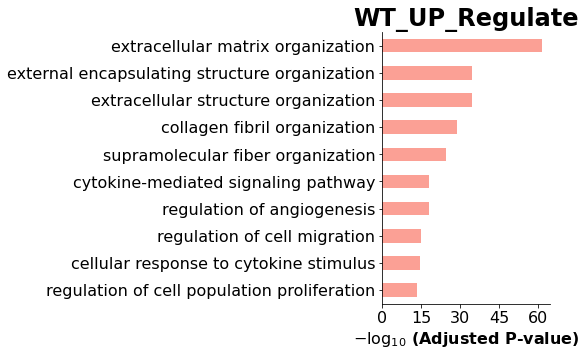

In [250]:
ax = gp.barplot(enr_WT_up.res2d.head(10), figsize=(3,5),title ="WT_UP_Regulate")

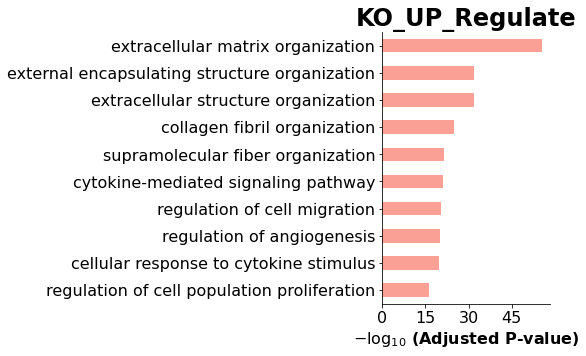

In [254]:
ax = gp.barplot(enr_KO_up.res2d.head(10), figsize=(3,5),title ="KO_UP_Regulate")